# Generate data for 1D Advection

This code generates data for the 1D Advection Equation. There are two possibilities: fix the initial condition and only vary the parameter (velocity) or vary both initial condition and parameter. If initial condition is fixed then it is a gaussian

# Import libraries

In [16]:
import numpy as np
import torch as tc
import GPy
import matplotlib.pyplot as plt
import os

# Define functions

In [17]:
def gaussian(x, mu=0, sigma=1):
    return 1 / (sigma * np.sqrt(2 * np.pi)) * np.exp(-((x - mu) ** 2) / (2 * sigma ** 2))

def gp(X,N, gaussian_ic):
    if gaussian_ic:
        x_values = np.arange(0,1,1./256) 
        y_values = gaussian(x_values, mu=.2, sigma=5e-2) 
        return y_values
        
    arr = []
    X = X[:, np.newaxis] 
    kernel = GPy.kern.RBF(input_dim=1, variance=0.4, lengthscale=0.2)
    
    for i in range(N):
        Y = np.random.multivariate_normal(np.zeros(X.shape[0]), kernel.K(X))
        arr.append(Y)
    return np.array(arr)

def advection(x,mu,t):
    length = np.shape(x)[-1]
    advected = np.zeros(length)
    for i in range(length):
        if i/length < mu*t:
            advected[i] = x[0]
        else:
            advected[i] = x[int(i-mu*t*length)]
    return advected


def get_data(samples, time, nu_values, gaussian_ic):
    if gaussian_ic:
        i_c = [gp(np.arange(0,1,1./256), samples, gaussian_ic)]
    else:
        i_c = gp(np.arange(0,1,1./256), samples, gaussian_ic)

    field = []
    parameter = []
    
    for count, init in enumerate(i_c):
        for nu in nu_values:
            output = []
            for count, t in enumerate(time): 
                result = advection(init, nu, t)
                output.append(result)
            field.append(output)
            parameter.append(np.concatenate((np.array([nu]), time)))

    return field, parameter

def generate_data_advection(info):
    training_samples = info['training_i_c']
    validation_samples = info['validation_i_c']
    testing_samples = info['testing_i_c']
    gaussian_ic = info['gaussian_ic']
    path_data = info['path_data']
    
    t_grid = np.arange(0,1,0.1)
    nu_values = np.arange(0.1,1,0.1)
    
    field_step_training, parameter_training = get_data(training_samples, t_grid, nu_values, gaussian_ic)
    field_step_validation, parameter_validation = get_data(validation_samples, t_grid, nu_values, gaussian_ic)

    print('field_step_training', np.shape(field_step_training))
    print('parameter_training', np.shape(parameter_training))
    print('field_step_validation', np.shape(field_step_validation))
    print('parameter_validation', np.shape(parameter_validation))

    np.save(path_data+'/field_step_training', np.array(field_step_training, dtype = 'float32'), allow_pickle=True, fix_imports=True)
    np.save(path_data+'/parameter_training', np.array(parameter_training, dtype = 'float32'), allow_pickle=True, fix_imports=True)

    np.save(path_data+'/field_step_validation', np.array(field_step_validation, dtype = 'float32'), allow_pickle=True, fix_imports=True)
    np.save(path_data+'/parameter_validation', np.array(parameter_validation, dtype = 'float32'), allow_pickle=True, fix_imports=True)
    




# Get Data

In [19]:
information = {
'training_i_c': 10,
'validation_i_c':10,
'testing_i_c':0,
'random_parameters': False,
'gaussian_ic': False,
'path_data' : '../../../../../scratch/aalelonghi/data_advection_fixed_ic'
}
os.makedirs(information['path_data'], exist_ok=True)
generate_data_advection(information)

field_step_training (9, 10, 256)
parameter_training (9, 11)
field_step_validation (9, 10, 256)
parameter_validation (9, 11)


# Look at data before using them!!!

In [20]:
tr = np.load(information['path_data']+'/field_step_training.npy')
val = np.load(information['path_data']+'/field_step_validation.npy')
p_tr = np.load(information['path_data']+'/parameter_training.npy')
p_val = np.load(information['path_data']+'/parameter_validation.npy')

print('field_step_training', np.shape(tr))
print('parameter_training', np.shape(val))
print('field_step_validation', np.shape(p_tr))
print('parameter_validation', np.shape(p_val))

field_step_training (9, 10, 256)
parameter_training (9, 10, 256)
field_step_validation (9, 11)
parameter_validation (9, 11)


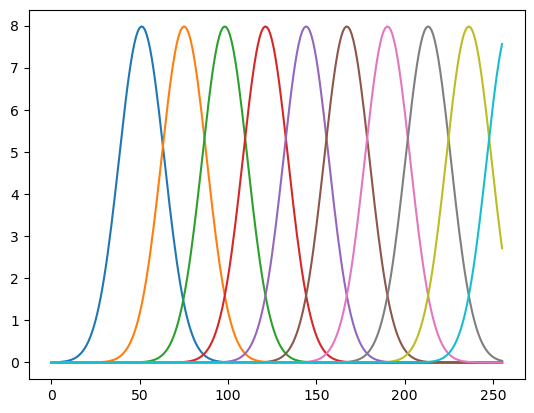

In [21]:
for i in range(10):
    plt.plot(tr[8][i])